# Andrew Bui

In [1]:
import pandas as pd
import datetime
import numpy as np
from matplotlib import pyplot as plt
import plotly.graph_objects as go
from plotly import colors
from tqdm.notebook import tqdm
from typing import Dict, List
from plotly.subplots import make_subplots
from scipy import stats
import plotly.express as px
import functools
import quandl
from patsy import dmatrices
import statsmodels.api as sm

import scipy as sp

%matplotlib inline
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier
pd.set_option('use_inf_as_na', True)
from collections import Counter
import pickle

import random
from sklearn.preprocessing import MinMaxScaler,StandardScaler



In [2]:
raw_df = pd.read_pickle("/Users/tb/Downloads/dataset.pkl")  
raw_df

actq      apq        atq       ceqq      cheq  \
date       ticker                                                      
2000-02-01 LLB        3.540    0.143      7.668      6.732     2.553   
2000-02-03 MYR      107.661   24.387    220.463    136.555     1.049   
2000-02-08 LZB      447.719   57.893    740.905    460.612    16.531   
           SJM      234.415   33.821    488.136    322.432    26.054   
2000-02-09 CSCO    7722.000  482.000  21391.000  16523.000  3968.000   
...                     ...      ...        ...        ...       ...   
2018-12-31 ELLO      77.786    1.907    255.123     90.949    61.530   
           MFCB      84.040   20.586    252.126    186.153    59.330   
           MFCB      79.628   16.437    242.757    193.929    56.640   
           PETZ      13.670    6.395     18.833      6.459     2.524   
           SGOC      15.429    0.088    156.187     98.344     5.608   

                      cogsq     csh12q    cshfdq     cshiq  cshopq  ...  \
date       ticker                                                   ...   
2000-02-01 LLB        0.458     6.3910     6.391     6.989     0.0  ...   
2000-02-03 MYR       36.883    25.5360    22.082    28.458     0.0  ...   
2000-02-08 LZB      274.525    52.2660    52.274    52.544     0.0  ...   
           SJM       91.172    28.8808    28.603    32.425     0.0  ...   
2000-02-09 CSCO    1422.000  3374.1250  3648.000  3445.000     0.0  ...   
...                     ...        ...       ...       ...     ...  ...   
2018-12-31 ELLO       2.272    10.9220    10.676       NaN     0.0  ...   
           MFCB      76.382    12.5350    12.535    12.600     0.0  ...   
           MFCB       4.650    12.5350    12.535    12.600     0.0  ...   
           PETZ      12.253     9.3245     9.424     9.424     0.0  ...   
           SGOC       0.712    15.6510    18.931    24.844     0.0  ...   

                   sector_code_815.0  sector_code_817.0  sector_code_822.0  \
date       ticker                                                            
2000-02-01 LLB                     0                  0                  0   
2000-02-03 MYR                     0                  0                  0   
2000-02-08 LZB                     0                  0                  0   
           SJM                     0                  0                  0   
2000-02-09 CSCO                    0                  0                  0   
...                              ...                ...                ...   
2018-12-31 ELLO                    0                  0                  0   
           MFCB                    0                  0                  1   
           MFCB                    0                  0                  1   
           PETZ                    0                  0                  0   
           SGOC                    0                  0                  0   

                   sector_code_823.0  sector_code_825.0  sector_code_830.0  \
date       ticker                                                            
2000-02-01 LLB                     0                  0                  0   
2000-02-03 MYR                     0                  0                  0   
2000-02-08 LZB                     0                  0                  0   
           SJM                     0                  0                  0   
2000-02-09 CSCO                    0                  0                  0   
...                              ...                ...                ...   
2018-12-31 ELLO                    0                  0                  0   
           MFCB                    0                  0                  0   
           MFCB                    0                  0                  0   
           PETZ                    0                  0                  0   
           SGOC                    0                  0                  0   

                   sector_code_835.0  sector_code_840.0  sector_code_845.0  \
da

#### The entries are 1 if the stock outperforms SPY by more than 5% in the earnings period and -1 if it underperforms by -10% and 0 if the performance is between these values.

In [3]:
def f(x):
    if x > 0.05:
        return 1
    elif x < -0.1:
        return -1
    else:
        return 0
    
data = raw_df.copy()
data['rel_outpf'] = data['pred_rel_return'].apply(f)
data['rel_outpf']


date        ticker
2000-02-01  LLB      -1
2000-02-03  MYR       1
2000-02-08  LZB       1
            SJM       1
2000-02-09  CSCO      0
                     ..
2018-12-31  ELLO      0
            MFCB      0
            MFCB      0
            PETZ      0
            SGOC      0
Name: rel_outpf, Length: 294412, dtype: int64

#### 2 if the stock return is more then 5% higher than the SPY return, 1 if it is more than 1% but less than 5% higher, 0 if it is between -1% and 1%, 
#### -2 if the stock underperforms the SPY by more than -5% and -1 if the performance is between -1% and -5%

In [4]:
def f1(x):
    if x > 0.05:
        return 2
    elif 0.01 < x <= 0.05:
        return 1
    elif -0.01 < x <= 0.01:
        return 0
    elif -0.05 < x <= -0.01:
        return -1
    elif x < -0.05:
        return -2
    else:
        return 0
    
data['rel_outpf_dt'] = data['pred_rel_return'].apply(f1)
data['rel_outpf_dt']

date        ticker
2000-02-01  LLB      -2
2000-02-03  MYR       2
2000-02-08  LZB       2
            SJM       2
2000-02-09  CSCO     -1
                     ..
2018-12-31  ELLO      0
            MFCB      0
            MFCB      0
            PETZ      0
            SGOC      0
Name: rel_outpf_dt, Length: 294412, dtype: int64

In [5]:
data.replace([np.inf,-np.inf],np.nan,inplace=True)
data = data.fillna(method='ffill')
data = data.fillna(0)

In [6]:
df_1 = data.loc['2001-01-01':'2004-01-01']
df_2 = data.loc['2001-01-01':'2004-04-01']
df_valid = data.loc['2004-01-01':'2006-04-01']
df_test = data.loc['2006-04-01':'2018-07-01']

In [7]:
opt_param_df = pd.read_pickle("/Users/tb/Desktop/Google/UChicago MSFM/Machine Learning /L6/optimal_hyperparameters.pkl")  

sigf_feat_df = pd.read_pickle("/Users/tb/Desktop/Google/UChicago MSFM/Machine Learning /L6/significant_features.pkl")  

shap_feat_df = pd.read_pickle("/Users/tb/Desktop/Google/UChicago MSFM/Machine Learning /L6/shap_features.pkl")  

opt_param_df
sigf_feat_df



[array(['rectq', 'apq', 'equity_invcapq', 'curr_ratioq', 'oeps12',
        'ibcomq', 'oepsxq', 'epsfiq', 'fcf_csfhdq', 'opepsq', 'market_cap',
        'lctq', 'dvpspq', 'pe_op_basicq', 'cash_ratioq', 'debt_atq',
        'cf_yield', 'epsfi12', 'atq', 'oepsxy', 'pe_op_dilq', 'rect_actq',
        'lagbe4', 'ltq', 'yearly_sales', 'dvy', 'csh12q', 'actq', 'revty',
        'prccq', 'invtq', 'quick_ratioq', 'cheq', 'roeq', 'xinty', 'at4',
        'lt_debtq', 'book_value_yield', 'cfo-per-share', 'capxq', 'cshprq',
        'ibcq', 'niq', 'lagseq4', 'dlttq', 'lagppent_alt4', 'mibq',
        'dltisy', 'cfmq', 'txditcq', 'ibcomy'], dtype=object),
 array(['cfmq', 'epspi12', 'oeps12', 'oepf12', 'saleq', 'epsfi12',
        'curr_ratioq', 'pe_op_dilq', 'ptpmq', 'csh12q', 'market_cap',
        'dvpspq', 'cfo-per-share', 'capeiq', 'fcf_yield', 'pe_incq',
        'fcf_csfhdq', 'req', 'rectq', 'yearly_sales', 'oancfy',
        'pay_turnq', 'lagicapt4', 'oancfy_q', 'prccq', 'lagppent_alt4',
        'pretre

In [8]:
# max = 0
# n = 0
# for i in range(len(sigf_feat_df )):
#     if len(sigf_feat_df [i]) > max:
#         max = len(sigf_feat_df [i])
#         n = i
#     else: continue

# n

In [9]:
train = df_1.reset_index().drop(['ticker','date',
                                    'next_period_return',
                                    'spy_next_period_return',
                                    'rel_outpf','rel_outpf_dt','pred_rel_return',
                                    'rel_outpf_dt','return', 'cum_ret', 'spy_cum_ret'],axis=1)

train_2 = df_2.reset_index().drop(['ticker','date',
                                    'next_period_return',
                                    'spy_next_period_return',
                                    'rel_outpf','rel_outpf_dt','pred_rel_return',
                                    'rel_outpf_dt','return', 'cum_ret', 'spy_cum_ret'],axis=1)


valid = df_valid.reset_index().drop(['ticker','date',
                                    'next_period_return',
                                    'spy_next_period_return',
                                    'rel_outpf','rel_outpf_dt','pred_rel_return',
                                    'rel_outpf_dt','return', 'cum_ret', 'spy_cum_ret'],axis=1)

test = df_test.reset_index().drop(['ticker','date',
                                    'next_period_return',
                                    'spy_next_period_return',
                                    'rel_outpf','rel_outpf_dt','pred_rel_return',
                                    'rel_outpf_dt','return', 'cum_ret', 'spy_cum_ret'],axis=1)

In [10]:
train_red = pd.DataFrame(data = train[sigf_feat_df [1]].values,columns = sigf_feat_df[1])
valid_red = pd.DataFrame(data = valid[sigf_feat_df [1]].values,columns = sigf_feat_df[1])
test_red = pd.DataFrame(data = test[sigf_feat_df [1]].values,columns = sigf_feat_df[1])

train_red2 = pd.DataFrame(data = train[sigf_feat_df [11]].values,columns = sigf_feat_df[11])
valid_red2 = pd.DataFrame(data = valid[sigf_feat_df [11]].values,columns = sigf_feat_df[11])
test_red2 = pd.DataFrame(data = test[sigf_feat_df [11]].values,columns = sigf_feat_df[11])

train_red3 = pd.DataFrame(data = train[sigf_feat_df [22]].values,columns = sigf_feat_df[22])
valid_red3 = pd.DataFrame(data = valid[sigf_feat_df [22]].values,columns = sigf_feat_df[22])
test_red3 = pd.DataFrame(data = test[sigf_feat_df [22]].values,columns = sigf_feat_df[22])

In [11]:
train_1_stock_returns = df_1['next_period_return']
valid_stock_returns = df_valid['next_period_return']
test_stock_returns = df_test['next_period_return']

y_1 = df_1['rel_outpf']
y_valid = df_valid['rel_outpf']
y_test = df_test['rel_outpf']

y_1 = y_1.values
y_valid = y_valid.values
y_test = y_test.values

In [12]:
import optuna
from optuna.trial import Trial
optuna.logging.set_verbosity(optuna.logging.FATAL)
import warnings
warnings.filterwarnings("ignore")

### Optuna Objective: Accuracy 1 to 3

In [13]:
def objective(trial:Trial,train=None,labels=None,val=None,val_labels=None,val_rets=None):

    ada_m_depth = trial.suggest_int('max_depth',1,5)
    ada_n_estimators = trial.suggest_int('n_estimators', 10,100,step=10)
    ada_learning_rate = trial.suggest_float('learning_rate',0.1,0.5, step=0.1)

    
    ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=ada_m_depth),
                                 n_estimators=ada_n_estimators,
                                 learning_rate=ada_learning_rate,
                                 algorithm="SAMME.R")

    ada_clf.fit(train,labels)
    preds = ada_clf.predict(val)
    accuracy = ada_clf.score(val,val_labels)
 
    return accuracy

In [14]:
study = optuna.create_study(direction="maximize")
from functools import partial

In [15]:
%%time
study.optimize(partial(objective,train=train_red,labels=y_1,val=valid_red,val_labels=y_valid,val_rets=valid_stock_returns), n_trials=20,n_jobs=-1)

CPU times: user 23min 47s, sys: 9.89 s, total: 23min 57s
Wall time: 3min 21s


In [16]:
study2 = optuna.create_study(direction="maximize")

In [17]:
%%time
study2.optimize(partial(objective,train=train_red2,labels=y_1,val=valid_red2,val_labels=y_valid,val_rets=valid_stock_returns), n_trials=20,n_jobs=-1)

CPU times: user 46min 32s, sys: 21.1 s, total: 46min 53s
Wall time: 5min 40s


In [18]:
study3 = optuna.create_study(direction="maximize")

In [19]:
%%time
study3.optimize(partial(objective,train=train_red3,labels=y_1,val=valid_red3,val_labels=y_valid,val_rets=valid_stock_returns), n_trials=20,n_jobs=-1)

CPU times: user 15min 23s, sys: 14.2 s, total: 15min 37s
Wall time: 2min 9s


In [20]:
study.best_params

{'max_depth': 5, 'n_estimators': 70, 'learning_rate': 0.2}

In [21]:
study2.best_params

{'max_depth': 4, 'n_estimators': 50, 'learning_rate': 0.4}

In [22]:
study3.best_params

{'max_depth': 3, 'n_estimators': 60, 'learning_rate': 0.4}

In [23]:
best_params = dict(list(study.best_params.items())[1: ])
best_params2 = dict(list(study2.best_params.items())[1: ])
best_params3 = dict(list(study3.best_params.items())[1: ])

In [25]:
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),**best_params)

In [26]:
ada_clf2 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),**best_params2)

In [27]:
ada_clf3 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),**best_params3)

In [28]:
start_dates = [pd.to_datetime('2001-01-01') + pd.DateOffset(months = 3 * i) for i in range(16)]
end_dates = [d + pd.DateOffset(months = 51) for d in start_dates]

training_frames = [data.loc[d:d+pd.DateOffset(months = 48)] for d in start_dates]
test_frames = [data.loc[d + pd.DateOffset(months=6):d+pd.DateOffset(months = 9)] for d in end_dates]

training_data = [d.reset_index().drop
                                 (['ticker','date',
                                    'next_period_return',
                                    'spy_next_period_return',
                                    'rel_outpf','rel_outpf_dt','pred_rel_return',
                                  'return', 'cum_ret', 'spy_cum_ret'],axis=1) for d in training_frames]

test_data = [d.reset_index().drop(['ticker','date',
                                    'next_period_return',
                                    'spy_next_period_return',
                                    'rel_outpf','rel_outpf_dt','pred_rel_return',
                                  'return', 'cum_ret', 'spy_cum_ret'],axis=1) for d in test_frames]

training_labels = [d['rel_outpf'].values for d in training_frames]
validation_labels = [d['rel_outpf'].values for d in test_frames]

In [29]:
def adaboost_feat_importances(m, df):
        
    return pd.DataFrame({'cols':df.columns, 'feat_imp': m.feature_importances_}
                       ).sort_values('feat_imp', ascending=False)

In [30]:
%%time
optimal_features = []


for i in range(len(training_data)):
    print(i)
    profits = []
    feat=[]

    ada_clf.fit(training_data[i],training_labels[i])
    fi = adaboost_feat_importances(ada_clf,training_data[i])
    features = fi[fi['feat_imp'] > 0.011]
    optimal_features.append(features)
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
CPU times: user 19min 56s, sys: 29.7 s, total: 20min 26s
Wall time: 20min 29s


In [31]:
%%time
optimal_features2 = []


for i in range(len(training_data)):
    print(i)
    profits = []
    feat=[]

    ada_clf2.fit(training_data[i],training_labels[i])
    fi = adaboost_feat_importances(ada_clf2,training_data[i])
    features = fi[fi['feat_imp'] > 0.011]
    optimal_features2.append(features)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
CPU times: user 14min 22s, sys: 20.7 s, total: 14min 42s
Wall time: 14min 45s


In [32]:
%%time
optimal_features3 = []


for i in range(len(training_data)):
    print(i)
    profits = []
    feat=[]

    ada_clf3.fit(training_data[i],training_labels[i])
    fi = adaboost_feat_importances(ada_clf3,training_data[i])
    features = fi[fi['feat_imp'] > 0.011]
    optimal_features3.append(features)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
CPU times: user 17min 1s, sys: 24.5 s, total: 17min 25s
Wall time: 17min 28s


In [33]:
optimal_features[9]['cols'].values

array(['bmq', 'dvpspq', 'cf_yield', 'oancfy_q', 'gpmq', 'fcf_yield',
       'prccq', 'fqtr_4', 'spcsrc_B+', 'txtq', 'buy_back_yield',
       'spcsrc_C', 'aftret_eqq', 'capeiq', 'cdvcy', 'optdrq',
       'rect_turnq', 'beq', 'cfo-per-share', 'sale_equityq',
       'book_value_yield', 'cash_conversionq', 'rectq', 'oepsxy',
       'cash_ltq', 'cfmq', 'at_turnq', 'ltq', 'ibcomq', 'lagicapt4',
       'roaq', 'opmadq', 'dprq', 'sic_1531', 'sector_code_705.0', 'lctq4',
       'market_cap', 'epspxq'], dtype=object)

In [34]:
P_L = []
x = [1]
ret = []

for i in range(len(optimal_features)-2):

        # if  len(test_data[i][optimal_features[i]['cols'].values]) > 0: #len(training_data[i][optimal_features[i]['cols'].values]) > 0 and
                ada_clf.fit(training_data[i][optimal_features[i]['cols'].values],training_labels[i])
                pred_i = ada_clf.predict(test_data[i][optimal_features[i]['cols'].values])
                
                profit_i = (pred_i * test_frames[i]['next_period_return']).sum()
                P_L.append(profit_i)
                positions = np.sum(np.abs(pred_i))
                
                ret.append((1.0/positions) * profit_i)
                x.append(x[i] + (x[i]/positions) * profit_i)
        # else: continue

In [35]:
P_L2 = []
x2= [1]
ret2 = []

for i in range(len(optimal_features2)-2):

        # if  len(test_data[i][optimal_features[i]['cols'].values]) > 0: #len(training_data[i][optimal_features[i]['cols'].values]) > 0 and
                ada_clf2.fit(training_data[i][optimal_features2[i]['cols'].values],training_labels[i])
                pred_i = ada_clf2.predict(test_data[i][optimal_features2[i]['cols'].values])
                
                profit_i = (pred_i * test_frames[i]['next_period_return']).sum()
                P_L2.append(profit_i)
                positions = np.sum(np.abs(pred_i))
                
                ret2.append((1.0/positions) * profit_i)
                x2.append(x[i] + (x[i]/positions) * profit_i)

In [36]:
x2

[1,
 1.1422865677655678,
 1.2173878509091962,
 1.1212286707336303,
 1.2261718591105082,
 1.3486682767195957,
 1.4161804027427456,
 1.3846103361892994,
 1.4063392304306273,
 1.2212645895316796,
 1.2590575007611404,
 1.2325658773453294,
 0.8870873549204601,
 0.8410418183791306,
 1.046208710738666]

In [37]:
P_L3 = []
x3 = [1]
ret3 = []

for i in range(len(optimal_features3)-2):

        # if  len(test_data[i][optimal_features[i]['cols'].values]) > 0: #len(training_data[i][optimal_features[i]['cols'].values]) > 0 and
                ada_clf3.fit(training_data[i][optimal_features3[i]['cols'].values],training_labels[i])
                pred_i = ada_clf3.predict(test_data[i][optimal_features3[i]['cols'].values])
                
                profit_i = (pred_i * test_frames[i]['next_period_return']).sum()
                P_L3.append(profit_i)
                positions = np.sum(np.abs(pred_i))
                
                ret3.append((1.0/positions) * profit_i)
                x3.append(x[i] + (x[i]/positions) * profit_i)

In [38]:
x3

[1,
 1.1411126232120965,
 1.2164022665127046,
 1.125918937046753,
 1.2287222236416762,
 1.3474229318094468,
 1.4161944279642351,
 1.3843536488087922,
 1.409758968988667,
 1.2291570734086632,
 1.2597934220653857,
 1.2352924527039126,
 0.8812582492251515,
 0.8427435925995155,
 1.0648644785868597]

In [39]:
SPY = pd.read_pickle(r'/Users/tb/Downloads/SPY_cum_ret.pkl')
SPY = SPY.loc['2001-01-01':'2004-07-01']
SPY = SPY.resample('Q').ffill()
SPY['spy_cum_ret'] = (SPY['spy_cum_ret'] - SPY['spy_cum_ret'][0]+1)
SPY['strategy_accuracy'] = x
SPY['strategy_accuracy2'] = x2
SPY['strategy_accuracy3'] = x3

<AxesSubplot:xlabel='date'>

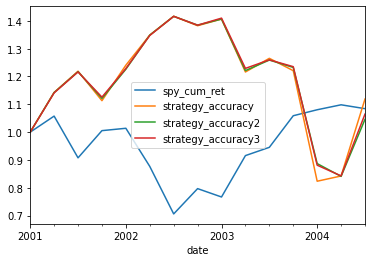

In [40]:
SPY.plot()

In [41]:
strategy_mean_ret = (SPY['strategy_accuracy'] - 1).diff().mean()
strategy_std = (SPY['strategy_accuracy'] - 1).diff().std()
strategy_sharpe = strategy_mean_ret/strategy_std
strategy_std

0.16312582974289533

In [42]:
strategy_mean_ret2 = (SPY['strategy_accuracy2'] - 1).diff().mean()
strategy_std2 = (SPY['strategy_accuracy2'] - 1).diff().std()
strategy_sharpe2 = strategy_mean_ret2/strategy_std2
strategy_std2

0.14330620103608532

In [43]:
strategy_mean_ret3 = (SPY['strategy_accuracy3'] - 1).diff().mean()
strategy_std3 = (SPY['strategy_accuracy3'] - 1).diff().std()
strategy_sharpe3 = strategy_mean_ret3/strategy_std3
strategy_std3

0.14539928505009603

In [44]:
spy_mean_ret = (SPY['spy_cum_ret'] - 1).diff().mean()
spy_std = (SPY['spy_cum_ret'] - 1).diff().std()
spy_sharpe = spy_mean_ret/spy_std
spy_std

0.0995698194845271

In [45]:
strat_ret = x[-1]
strat_ret2 = x2[-1]
strat_ret3 = x3[-1]
SPY_ret = SPY['spy_cum_ret'][-1]

In [46]:
strategy_ret = (SPY['strategy_accuracy'] - 1).diff().values[1:]
strategy_ret2 = (SPY['strategy_accuracy2'] - 1).diff().values[1:]
strategy_ret3 = (SPY['strategy_accuracy3'] - 1).diff().values[1:]
spy_ret = (SPY['spy_cum_ret'] - 1).diff().values[1:]

In [47]:
beta_strat = (np.cov(spy_ret,strategy_ret)/np.var(spy_ret))[1,0]
beta_strat2 = (np.cov(spy_ret,strategy_ret2)/np.var(spy_ret))[1,0]
beta_strat3 = (np.cov(spy_ret,strategy_ret3)/np.var(spy_ret))[1,0]
beta_strat

-0.7295629554779807

In [48]:
residual_ret = strategy_ret - beta_strat * spy_ret
residual_ret2 = strategy_ret2 - beta_strat2 * spy_ret
residual_ret3 = strategy_ret3 - beta_strat3 * spy_ret
IR = np.mean(residual_ret)/np.std(residual_ret)
IR2 = np.mean(residual_ret2)/np.std(residual_ret2)
IR3 = np.mean(residual_ret3)/np.std(residual_ret3)
IR

0.09008123533998692

In [49]:
alpha = np.mean(residual_ret)
alpha2 = np.mean(residual_ret2)
alpha3 = np.mean(residual_ret3)
alpha

0.012900600759843847

In [50]:
avr = np.exp(np.log(x[-1])/15.) - 1
avr2 = np.exp(np.log(x2[-1])/15.) - 1
avr3 = np.exp(np.log(x3[-1])/15.) - 1
spy_avr = np.exp(np.log(SPY['spy_cum_ret'][-2])/15.) - 1

In [51]:
def max_drawdown(returns):
        local_max = [n for n in range(len(returns)-1) if ((n==0) and (returns[0] > returns[1])) or 
           ((n > 0) and  (returns[n-1]<returns[n]) and (returns[n+1]<returns[n]))] 
        
        local_min = [n for n in range(1,len(returns)) if ((n == len(returns)-1) and (returns[-1] < returns[-2])) or
                (returns[n-1]>returns[n]) and (returns[n+1]>returns[n])]
        
        def next_local_min(n):
            if [m for m in local_min if m > n]:
                return [m for m in local_min if m > n][0]
            else: return None
        
        drawdowns = [(n,next_local_min(n)) for n in local_max]
        drawdown_values = [returns[n] - returns[m] for (n,m) in drawdowns if m != None]
        if drawdown_values:
            return  np.max(drawdown_values)
        else: return 0.0

In [52]:
SPY_A = SPY.iloc[1:].resample('A').ffill()

In [53]:
starting_year = '2001'
a = SPY_A.loc[starting_year]['spy_cum_ret'].values
b = SPY_A.loc[starting_year]['strategy_accuracy'].values
c = SPY_A.loc[starting_year]['strategy_accuracy2'].values
d = SPY_A.loc[starting_year]['strategy_accuracy3'].values

spy_maxdd = max_drawdown((SPY_A.loc[starting_year:]['spy_cum_ret'] - a + 1).values)
strat_maxdd= max_drawdown((SPY_A.loc[starting_year:]['strategy_accuracy'] - b + 1).values)
strat_maxdd2= max_drawdown((SPY_A.loc[starting_year:]['strategy_accuracy2'] - c + 1).values)
strat_maxdd3= max_drawdown((SPY_A.loc[starting_year:]['strategy_accuracy3'] - d + 1).values)

In [54]:
stat = pd.DataFrame(data = [[spy_sharpe, SPY_ret, spy_avr, spy_maxdd, 0, 0],
                            [strategy_sharpe, strat_ret, avr, strat_maxdd, IR, alpha],
                            [strategy_sharpe2, strat_ret2, avr2, strat_maxdd2, IR2, alpha2],
                            [strategy_sharpe3, strat_ret3, avr3, strat_maxdd3, IR3, alpha3]], 
                            index = ['SPY', 'Stategy_accuracy', 'Stategy_accuracy2', 'Stategy_accuracy3'], 
                            columns= ['Sharpe', 'Cum Ret', 'Annual Ret', 'Max Drawdown', 'Info Ratio', 'Alpha' ]) 
stat

,Sharpe,Cum Ret,Annual Ret,Max Drawdown,Info Ratio,Alpha
SPY,0.060553,1.084409,0.006270,0.208378,0.000000,0.000000
Stategy_accuracy,0.052119,1.119027,0.007525,0.263467,0.090081,0.012901
Stategy_accuracy2,0.023032,1.046209,0.003016,0.338402,0.061239,0.007542
Stategy_accuracy3,0.031865,1.064864,0.004199,0.319489,0.070221,0.008829


This strategy is to optimize for the accuracy of the model. In all 3 optimal feature sets, the max drawdown underperformed the S&P. The worse max drawdown took longer for the strategy to recover and outperform the SPY's return. The first strategy outperformed the strategy 2 and 3 in term of Sharpe ratio, annuallize return, information ratio and alpha.The first strategy could be an overfit. The strategy 2 and 3 performed similiarly in all of statistics.

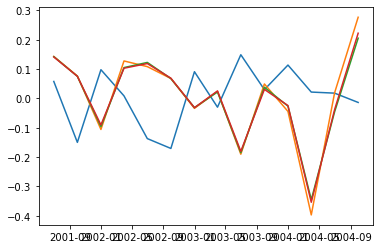

In [55]:
plt.plot((SPY['spy_cum_ret']-1).diff());
plt.plot((SPY['strategy_accuracy'] - 1).diff());
plt.plot((SPY['strategy_accuracy2'] - 1).diff());
plt.plot((SPY['strategy_accuracy3'] - 1).diff());

### Optuna Objective: Min Drawdown

In [56]:
def objective_mdd(trial:Trial,train=None,labels=None,val=None,val_labels=None,val_rets=None):

    ada_m_depth = trial.suggest_int('max_depth',1,5)
    ada_n_estimators = trial.suggest_int('n_estimators', 10,100,step=10)
    ada_learning_rate = trial.suggest_float('learning_rate',0.1,0.5, step=0.1)

    
    ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=ada_m_depth),
                                 n_estimators=ada_n_estimators,
                                 learning_rate=ada_learning_rate,
                                 algorithm="SAMME.R")

    ada_clf.fit(train,labels)
    preds = ada_clf.predict(val)
    # accuracy = ada_clf.score(val,val_labels)
    # profit = (preds * val_rets).sum()

    def max_drawdown(returns):
        local_max = [n for n in range(len(returns)-1) if ((n==0) and (returns[0] > returns[1])) or 
           ((n > 0) and  (returns[n-1]<returns[n]) and (returns[n+1]<returns[n]))] 
        
        local_min = [n for n in range(1,len(returns)) if ((n == len(returns)-1) and (returns[-1] < returns[-2])) or
                (returns[n-1]>returns[n]) and (returns[n+1]>returns[n])]
        
        def next_local_min(n):
            if [m for m in local_min if m > n]:
                return [m for m in local_min if m > n][0]
            else: return None
        
        drawdowns = [(n,next_local_min(n)) for n in local_max]
        drawdown_values = [returns[n] - returns[m] for (n,m) in drawdowns if m != None]
        if drawdown_values:
            return  np.max(drawdown_values)
        else: return 0.0
    return max_drawdown(preds)


In [57]:
study_4 = optuna.create_study(direction="minimize")

In [58]:
%%time
study_4.optimize(partial(objective_mdd,train=train_red,labels=y_1,val=valid_red,val_labels=y_valid,val_rets=valid_stock_returns), n_trials=20,n_jobs=-1)

CPU times: user 26min 56s, sys: 15.5 s, total: 27min 11s
Wall time: 3min 30s


In [59]:
study_4.best_params

{'max_depth': 4, 'n_estimators': 20, 'learning_rate': 0.1}

In [61]:
best_params4 = dict(list(study_4.best_params.items())[1: ])

In [62]:
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),**best_params4)

In [63]:
%%time
optimal_features = []


for i in range(len(training_data)):
    print(i)
    profits = []
    feat=[]

    ada_clf.fit(training_data[i],training_labels[i])
    fi = adaboost_feat_importances(ada_clf,training_data[i])
    features = fi[fi['feat_imp'] > 0.011]
    optimal_features.append(features)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
CPU times: user 6min 6s, sys: 10.5 s, total: 6min 16s
Wall time: 6min 21s


In [64]:
P_L4 = []
x4 = [1]
ret4 = []

for i in range(len(optimal_features)-2):

        ada_clf.fit(training_data[i][optimal_features[i]['cols'].values],training_labels[i])
        pred_i = ada_clf.predict(test_data[i][optimal_features[i]['cols'].values])
        
        profit_i = (pred_i * test_frames[i]['next_period_return']).sum()
        P_L4.append(profit_i)
        positions = np.sum(np.abs(pred_i))
        
        ret4.append((1.0/positions) * profit_i)
        x4.append(x[i] + (x[i]/positions) * profit_i)

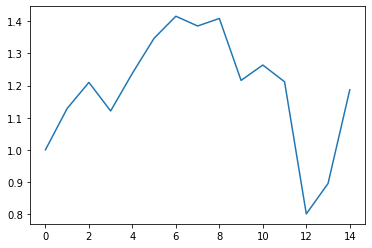

In [65]:
plt.plot(x4);

In [66]:
SPY['strategy_mindd'] = x4

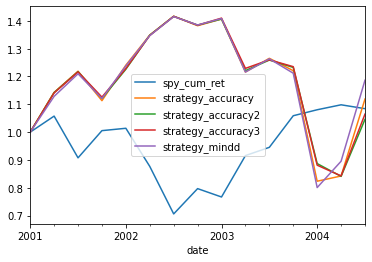

In [67]:
SPY.plot();

In [68]:
strategy_mindd_ret = (SPY['strategy_mindd'] - 1).diff().mean()
strategy_mindd_std = (SPY['strategy_mindd'] - 1).diff().std()
strategy_mindd_sharpe = strategy_mindd_ret/strategy_mindd_std
strategy_mindd_std

0.1675226449200707

In [69]:
strat_mindd_cumret = x4[-1]

strat_mindd_ret = (SPY['strategy_mindd'] - 1).diff().values[1:]

beta_bg_new = (np.cov(spy_ret,strat_mindd_ret)/np.var(spy_ret))[1,0]
beta_bg_new

-0.7342774959931614

In [70]:
residual_ret_mindd = strat_mindd_ret - beta_bg_new * spy_ret
IR_strat_mindd = np.mean(residual_ret_mindd)/np.std(residual_ret_mindd)
alpha_mindd = np.mean(residual_ret_mindd)

In [71]:
SPY_A = SPY.iloc[1:].resample('A').ffill()
e = SPY_A.loc[starting_year]['strategy_mindd'].values
strat_maxdd4 = max_drawdown((SPY_A.loc[starting_year:]['strategy_mindd'] - e + 1).values)

avr4 = np.exp(np.log(x4[-1])/15.) - 1

In [72]:
stat.loc['Stategy_MDD'] = [strategy_mindd_sharpe, strat_mindd_cumret, avr4, strat_maxdd4, IR_strat_mindd , alpha_mindd]
stat

,Sharpe,Cum Ret,Annual Ret,Max Drawdown,Info Ratio,Alpha
SPY,0.060553,1.084409,0.006270,0.208378,0.000000,0.000000
Stategy_accuracy,0.052119,1.119027,0.007525,0.263467,0.090081,0.012901
Stategy_accuracy2,0.023032,1.046209,0.003016,0.338402,0.061239,0.007542
Stategy_accuracy3,0.031865,1.064864,0.004199,0.319489,0.070221,0.008829
Stategy_MDD,0.079624,1.186743,0.011480,0.198281,0.120312,0.017766


The optuna optimzied min drawdown strategy outperformed SPY and the 3 accuracy optimized in all performance statistic.

### Run the analysis as the example in week 7 lecture

In [73]:
with open(r'/Users/tb/Desktop/Google/UChicago MSFM/Machine Learning /L6/optimal_hyperparameters.pkl','rb') as f:
    optimal_hyperparameters = pickle.load(f)

In [74]:
with open(r"/Users/tb/Desktop/Google/UChicago MSFM/Machine Learning /L6/significant_features.pkl",'rb') as f:
    classifiers = pickle.load(f)

In [75]:
with open(r"/Users/tb/Desktop/Google/UChicago MSFM/Machine Learning /L6/shap_features.pkl",'rb') as f:
    shap_features = pickle.load(f)

In [76]:
scaler = StandardScaler()
scalers = [StandardScaler() for i in range(len(start_dates)-1)]
           
opt_training_data = [pd.DataFrame(scalers[i].fit_transform(training_frames[i][shap_features[i]].values),columns=shap_features[i]) for i in range(len(start_dates)-1)]
opt_valid_data = [pd.DataFrame(scalers[i].fit_transform(training_frames[i][shap_features[i]].values),columns=shap_features[i]) for i in range(len(start_dates)-1)]
opt_test_data = [pd.DataFrame(scalers[i].transform(test_frames[i][shap_features[i]].values),columns=shap_features[i]) for i in range(len(start_dates)-1)]

In [77]:
opt_training_data

[            apq  cash_ratioq  cf_yield    oepsxy  rect_actq     prccq  \
 0     -0.086835    -0.062718 -0.033131 -0.296151  -0.010830 -0.713029   
 1     -0.086301    -0.062718 -0.017077 -0.134350  -0.010830 -0.550515   
 2     -0.086869    -0.062718 -0.033833 -0.226118  -0.010830 -0.766312   
 3     -0.086519    -0.134010  0.007007  0.005716   0.026033  0.845507   
 4     -0.086789     0.061029 -0.031219 -0.093296  -0.018219 -0.593141   
 ...         ...          ...       ...       ...        ...       ...   
 57660 -0.086137    -0.141378 -0.015174 -0.361354  -0.009966 -0.437980   
 57661 -0.086812     0.662797 -0.015174 -0.035338  -0.009966  1.093594   
 57662 -0.086708    -0.085855  0.039112 -0.023263  -0.032125 -0.544121   
 57663 -0.085943    -0.131872  0.008119 -0.110201  -0.038506 -0.512577   
 57664 -0.080003    -0.138233 -0.014394 -0.209213   0.038835 -0.593141   
 
            cheq      roeq  book_value_yield       niq   lagseq4     dlttq  \
 0     -0.076536  0.002685      

In [78]:
x5 = [1]
ret5 = []

for i in range(len(start_dates)-1):
        
        ada_clf.fit(opt_training_data[i],training_labels[i])

        preds = ada_clf.predict(opt_test_data[i])
        profit_i = (preds*test_frames[i]['next_period_return']).sum()
        ret5.append(profit_i)
        num_names = len(opt_test_data[i])
        x5.append(x5[i] + (x5[i]/num_names)*profit_i)

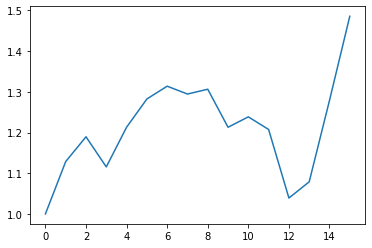

In [79]:
plt.plot(x5);

In [80]:
x5

[1,
 1.1286726453282485,
 1.1895270224287726,
 1.1155097188099465,
 1.2130399467202595,
 1.2823780159203335,
 1.3139235185526954,
 1.2945994141148016,
 1.3064293160037788,
 1.212963437366218,
 1.238555240798102,
 1.207519342124035,
 1.0390171325860462,
 1.0788704918661471,
 1.2789182791754807,
 1.4857806727047227]

In [ ]:
# SPY_N = pd.read_pickle(r'/Users/tb/Downloads/SPY_cum_ret.pkl')
# SPY2 = SPY_N.loc['2001-01-01':'2004-12-01']
# SPY2 = SPY2.resample('Q').ffill()
# SPY2['spy_cum_ret'] = (SPY2['spy_cum_ret'] - SPY2['spy_cum_ret'][0]+1)
# SPY2['strategy_comb_accuracy'] = x5

In [81]:
SPY['strategy_comb_accuracy'] = x5[:-1]
SPY_A = SPY.iloc[1:].resample('A').ffill()
f = SPY_A.loc[starting_year]['strategy_comb_accuracy'].values
strat_comb_accuracy = max_drawdown((SPY_A.loc[starting_year:]['strategy_comb_accuracy'] - f + 1).values)
strat_comb_accuracy



0.08708007199076673

<AxesSubplot:xlabel='date'>

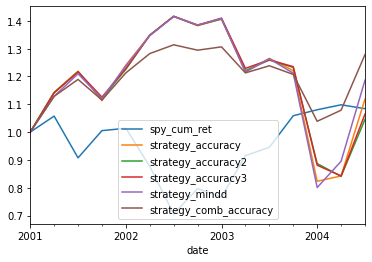

In [82]:
SPY.plot()

In [83]:
strategy_comb_accuracy_ret = (SPY['strategy_comb_accuracy'] - 1).diff().mean()
strategy_comb_accuracy_std = (SPY['strategy_comb_accuracy'] - 1).diff().std()
strategy_comb_accuracy_sharpe = strategy_comb_accuracy_ret/strategy_comb_accuracy_std
strategy_comb_accuracy_std

0.09461033072205897

In [84]:
strategy_comb_accuracy_cumret = x5[-1]

strategy_comb_accuracy_ret = (SPY['strategy_comb_accuracy'] - 1).diff().values[1:]

beta_bg_new = (np.cov(spy_ret,strategy_comb_accuracy_ret)/np.var(spy_ret))[1,0]
beta_bg_new

-0.4106464439680087

In [85]:
residual_ret_strategy_comb_accuracy = strategy_comb_accuracy_ret - beta_bg_new * spy_ret
IR_strat_comb_accuracy= np.mean(residual_ret_strategy_comb_accuracy)/np.std(residual_ret_strategy_comb_accuracy)
alpha_strat_comb_accuracy = np.mean(residual_ret_strategy_comb_accuracy)

avr5 = np.exp(np.log(x5[-1])/15.) - 1

In [86]:
stat.loc['Stategy_comb_accuracy'] = [strategy_comb_accuracy_sharpe, strategy_comb_accuracy_cumret, avr5, strat_comb_accuracy, IR_strat_comb_accuracy, alpha_strat_comb_accuracy]
stat

,Sharpe,Cum Ret,Annual Ret,Max Drawdown,Info Ratio,Alpha
SPY,0.060553,1.084409,0.006270,0.208378,0.000000,0.000000
Stategy_accuracy,0.052119,1.119027,0.007525,0.263467,0.090081,0.012901
Stategy_accuracy2,0.023032,1.046209,0.003016,0.338402,0.061239,0.007542
Stategy_accuracy3,0.031865,1.064864,0.004199,0.319489,0.070221,0.008829
Stategy_MDD,0.079624,1.186743,0.011480,0.198281,0.120312,0.017766
Stategy_comb_accuracy,0.210577,1.485781,0.026747,0.087080,0.268077,0.022399


The Strategy using the given data sets outperformed the all above strategies in term of all of the statistics. This strategy performed better because the parameters optimzied through multiple steps.

### New Strategy

In [87]:
y_2 = df_1['rel_outpf_dt']
y_valid2 = df_valid['rel_outpf_dt']
y_test2 = df_test['rel_outpf_dt']

y_2 = y_2.values
y_valid2 = y_valid2.values
y_test2 = y_test2.values

In [88]:
study2 = optuna.create_study(direction="minimize")

In [89]:
%%time
study2.optimize(partial(objective_mdd,train=train_red2,labels=y_2,val=valid_red2,val_labels=y_valid2,val_rets=valid_stock_returns), n_trials=20,n_jobs=-1)

CPU times: user 41min 8s, sys: 24.1 s, total: 41min 32s
Wall time: 6min 59s


In [90]:
study2.best_params

{'max_depth': 1, 'n_estimators': 20, 'learning_rate': 0.4}

In [91]:
best_params5 = dict(list(study2.best_params.items())[1: ])
best_params5 

{'n_estimators': 20, 'learning_rate': 0.4}

In [92]:
ada_clf5 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),**best_params5)

In [93]:
%%time
optimal_features5 = []


for i in range(len(training_data)):
    print(i)
    profits = []
    feat=[]

    ada_clf5.fit(training_data[i],training_labels[i])
    fi = adaboost_feat_importances(ada_clf5,training_data[i])
    features = fi[fi['feat_imp'] > 0.011]
    optimal_features5.append(features)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
CPU times: user 5min 58s, sys: 8.7 s, total: 6min 7s
Wall time: 6min 8s


In [94]:
optimal_features5

[                 cols  feat_imp
 86             dvpspq      0.10
 87              prccq      0.10
 39             oepsxq      0.10
 91   book_value_yield      0.05
 176          rd_saleq      0.05
 18            epsfi12      0.05
 155        fcf_csfhdq      0.05
 156         fcf_yield      0.05
 112              gpmq      0.05
 46             prcraq      0.05
 10              cshoq      0.05
 92         market_cap      0.05
 170          at_turnq      0.05
 607          spcsrc_C      0.05
 123             lctq4      0.05
 124               be4      0.05
 43             optdrq      0.05,
                  cols  feat_imp
 43             optdrq      0.10
 86             dvpspq      0.10
 92         market_cap      0.10
 39             oepsxq      0.10
 170          at_turnq      0.05
 18            epsfi12      0.05
 176          rd_saleq      0.05
 155        fcf_csfhdq      0.05
 112              gpmq      0.05
 87              prccq      0.05
 46             prcraq      0.05
 91   boo

In [95]:
P_L6 = []
x6 = [1]
ret6 = []

for i in range(len(optimal_features5)-2):

        ada_clf5.fit(training_data[i][optimal_features5[i]['cols'].values],training_labels[i])
        pred_i = ada_clf5.predict(test_data[i][optimal_features5[i]['cols'].values])
        
        profit_i = (pred_i * test_frames[i]['next_period_return']).sum()
        P_L6.append(profit_i)
        positions = np.sum(np.abs(pred_i))
        
        ret6.append((1.0/positions) * profit_i)
        x6.append(x6[i] + (x6[i]/positions) * profit_i)

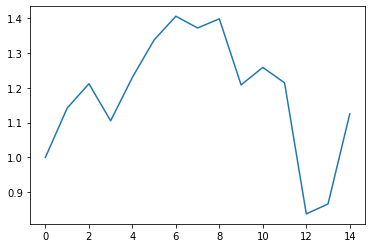

In [96]:
plt.plot(x6)

In [97]:
SPY['strategy2_mindd'] = x6

<AxesSubplot:xlabel='date'>

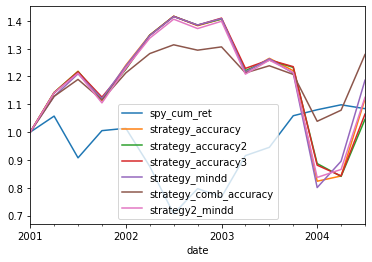

In [98]:
SPY.plot()

In [99]:
strategy2_mindd_ret = (SPY['strategy2_mindd'] - 1).diff().mean()
strategy2_mindd_std = (SPY['strategy2_mindd'] - 1).diff().std()
strategy2_mindd_sharpe = strategy2_mindd_ret/strategy2_mindd_std
strategy2_mindd_std

0.15681463209787336

In [100]:
strat2_mindd_cumret = x6[-1]

strat2_mindd_ret = (SPY['strategy2_mindd'] - 1).diff().values[1:]

beta_strat2_mindd = (np.cov(spy_ret,strat2_mindd_ret)/np.var(spy_ret))[1,0]
beta_strat2_mindd

-0.7162322239993413

In [101]:
residual_ret2_mindd = strat2_mindd_ret - beta_strat2_mindd * spy_ret
IR_strat2_mindd = np.mean(residual_ret2_mindd)/np.std(residual_ret2_mindd)
alpha_mindd2 = np.mean(residual_ret2_mindd)

In [102]:
SPY_A = SPY.iloc[1:].resample('A').ffill()
g = SPY_A.loc[starting_year]['strategy2_mindd'].values
strat_maxdd6 = max_drawdown((SPY_A.loc[starting_year:]['strategy2_mindd'] - g + 1).values)

avr6 = np.exp(np.log(x6[-1])/15.) - 1

In [103]:
stat.loc['Stategy2_MDD'] = [strategy2_mindd_sharpe, strat2_mindd_cumret, avr6, strat_maxdd6, IR_strat2_mindd , alpha_mindd2]
stat

,Sharpe,Cum Ret,Annual Ret,Max Drawdown,Info Ratio,Alpha
SPY,0.060553,1.084409,0.006270,0.208378,0.000000,0.000000
Stategy_accuracy,0.052119,1.119027,0.007525,0.263467,0.090081,0.012901
Stategy_accuracy2,0.023032,1.046209,0.003016,0.338402,0.061239,0.007542
Stategy_accuracy3,0.031865,1.064864,0.004199,0.319489,0.070221,0.008829
Stategy_MDD,0.079624,1.186743,0.011480,0.198281,0.120312,0.017766
Stategy_comb_accuracy,0.210577,1.485781,0.026747,0.087080,0.268077,0.022399
Stategy2_MDD,0.057036,1.125217,0.007896,0.247028,0.096761,0.013262


The new strategy used the more detail of classfication of return with Stategy_accuracy2 features then optimzied for min drawdown improved the statistics compared to Stategy_accuracy2. 
Although the new strategy outperformed all the accuracy optimized stategies but still underperformed Stategy_MDD and Stategy_comb_accuracy.

In [111]:
study7 = optuna.create_study(direction="minimize")

In [112]:
%%time
study7.optimize(partial(objective_mdd,train=train_red,labels=y_2,val=valid_red,val_labels=y_valid,val_rets=valid_stock_returns), n_trials=20,n_jobs=-1)

CPU times: user 40min 18s, sys: 23.1 s, total: 40min 41s
Wall time: 5min 2s


In [113]:
study7.best_params

{'max_depth': 1, 'n_estimators': 30, 'learning_rate': 0.1}

In [114]:
best_params7 = dict(list(study7.best_params.items())[1: ])
best_params7 

{'n_estimators': 30, 'learning_rate': 0.1}

In [115]:
ada_clf7 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),**best_params7)

In [120]:
%%time
optimal_features7 = []


for i in range(len(training_data)):
    print(i)
    profits = []
    feat=[]

    ada_clf7.fit(training_data[i],training_labels[i])
    fi = adaboost_feat_importances(ada_clf7,training_data[i])
    features = fi[fi['feat_imp'] > 0.011]
    optimal_features7.append(features)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
CPU times: user 9min 41s, sys: 14.5 s, total: 9min 56s
Wall time: 9min 58s


In [122]:
P_L7 = []
x7 = [1]
ret7 = []

for i in range(len(optimal_features7)-2):

        ada_clf7.fit(training_data[i][optimal_features7[i]['cols'].values],training_labels[i])
        pred_i = ada_clf7.predict(test_data[i][optimal_features7[i]['cols'].values])
        
        profit_i = (pred_i * test_frames[i]['next_period_return']).sum()
        P_L7.append(profit_i)
        positions = np.sum(np.abs(pred_i))
        
        ret7.append((1.0/positions) * profit_i)
        x7.append(x7[i] + (x7[i]/positions) * profit_i)

In [123]:
SPY['strategy_mindd_new'] = x7

<AxesSubplot:xlabel='date'>

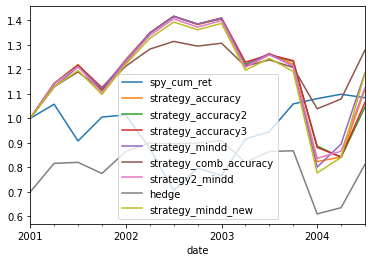

In [124]:
SPY.plot()

In [125]:
strategy_mindd_ret_new = (SPY['strategy_mindd_new'] - 1).diff().mean()
strategy_mindd_std_new = (SPY['strategy_mindd_new'] - 1).diff().std()
strategy_mindd_sharpe = strategy_mindd_ret_new/strategy_mindd_std_new
strategy_mindd_std_new

0.174295620271695

In [126]:
strat_mindd_cumret_new = x7[-1]

strat2_mindd_new_ret = (SPY['strategy_mindd_new'] - 1).diff().values[1:]

beta_strat_mindd_new = (np.cov(spy_ret,strat2_mindd_new_ret)/np.var(spy_ret))[1,0]
beta_strat_mindd_new

-0.7272572573681124

In [127]:
residual_ret_mindd_new = strat2_mindd_new_ret - beta_strat_mindd_new * spy_ret
IR_strat_mindd_new = np.mean(residual_ret_mindd_new )/np.std(residual_ret_mindd_new )
alpha_mindd_new = np.mean(residual_ret_mindd_new )

In [128]:
SPY_A = SPY.iloc[1:].resample('A').ffill()
h = SPY_A.loc[starting_year]['strategy_mindd_new'].values
strat_maxdd7 = max_drawdown((SPY_A.loc[starting_year:]['strategy_mindd_new'] - h + 1).values)

avr7 = np.exp(np.log(x7[-1])/15.) - 1

In [129]:
stat.loc['Stategy_MDD_new'] = [strategy_mindd_sharpe, strat_mindd_cumret_new, avr7, strat_maxdd7, IR_strat_mindd_new , alpha_mindd_new]
stat

,Sharpe,Cum Ret,Annual Ret,Max Drawdown,Info Ratio,Alpha
SPY,0.060553,1.084409,0.006270,0.208378,0.000000,0.000000
Stategy_accuracy,0.052119,1.119027,0.007525,0.263467,0.090081,0.012901
Stategy_accuracy2,0.023032,1.046209,0.003016,0.338402,0.061239,0.007542
Stategy_accuracy3,0.031865,1.064864,0.004199,0.319489,0.070221,0.008829
Stategy_MDD,0.079624,1.186743,0.011480,0.198281,0.120312,0.017766
Stategy_comb_accuracy,0.210577,1.485781,0.026747,0.087080,0.268077,0.022399
Stategy2_MDD,0.057036,1.125217,0.007896,0.247028,0.096761,0.013262
Stategy_MDD_new,0.075495,1.184218,0.011336,0.177216,0.113157,0.017543


I tried the new detail label as in Stategy2_MDD but now with the set of features in the Stategy_accuracy. The new label lowered the max drawdown but able to keep other statistics compare to Stategy_MDD. 

The best performance strategy is Stategy_comb_accuracy where we using the optimized features from the Canvas.